# Analyzes HERS Rating Score vs. AkWarm Score

Uses the R language kernel.

In [127]:
df = read.csv('final_iecc.csv')
df_ns = df[df$Has_Secondary_Htr == 'No',]
df_ns = df_ns[df_ns$EnBlowerTestOrEst != 'Estimated', ]
#summary(df_ns)

In [128]:
colnames(df)

[1] "AFUE_final_primary"       "AFUE_final_secondary"    
 [3] "City_ID"                  "DHWenergyFactor"         
 [5] "EnBlowerTestOrEst"        "FileName"                
 [7] "Garage_Car_Count"         "Has_Secondary_Htr"       
 [9] "HeatingFuel_Secondary"    "HtgSysEffic"             
[11] "Is_Special_DHW"           "Is_Special_Space"        
[13] "NaturalACH"               "Rating_Region"           
[15] "SouthWinArea"             "VentType"                
[17] "WinWallRatio"             "ID"                      
[19] "Result"                   "RatingPoints"            
[21] "EnergyCost"               "ElectricUse"             
[23] "SavingsAnnual"            "IECCSavingsFract"        
[25] "IECCEnvelopeSavingsFract" "HomeAddress"             
[27] "HomeCity"                 "Batch"                   
[29] "HERSScore"                "HouseType"               
[31] "RatingDate"               "RaterName"               
[33] "UserAFUE"                 "FloorArea"               
[35] "GarageArea"               "HeatingFuel"             
[37] "DHWFuel"                  "EvaluatedFloorArea"      
[39] "EvaluatedGarageArea"      "AkWarm.HERS.difference"

In [129]:
library(ggplot2)

In [130]:
options(repr.plot.width = 10)
options(repr.plot.height = 6)

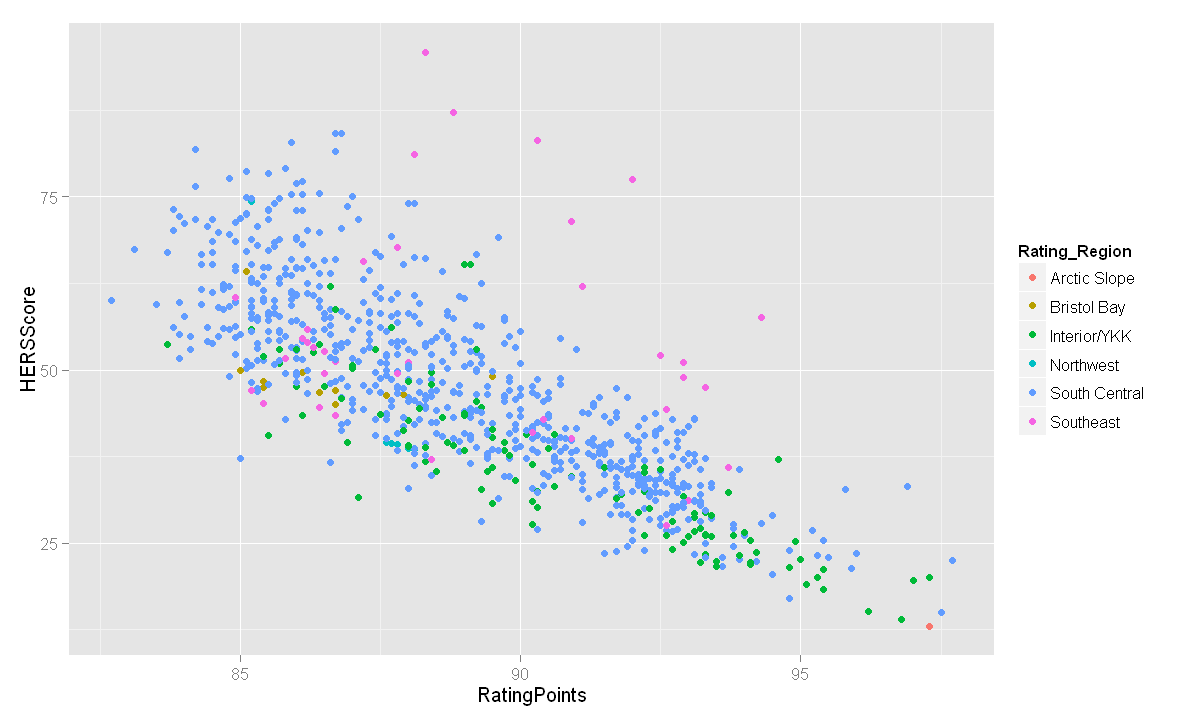

In [132]:
ggplot(df_ns, aes(RatingPoints, HERSScore)) + geom_point(aes(color=Rating_Region), size=2)
#ggsave(file="AkPts_HERS_by_fuel.png", width=10, height=7)

In [134]:
fit = lm('HERSScore ~ RatingPoints + HeatingFuel + Rating_Region + HouseType + Garage_Car_Count + NaturalACH + HtgSysEffic + WinWallRatio + SouthWinArea + EvaluatedGarageArea + VentType + Is_Special_Space + Is_Special_DHW', data=df_ns)
summary(fit)



Call:
lm(formula = "HERSScore ~ RatingPoints + HeatingFuel + Rating_Region + HouseType + Garage_Car_Count + NaturalACH + HtgSysEffic + WinWallRatio + SouthWinArea + EvaluatedGarageArea + VentType + Is_Special_Space + Is_Special_DHW", 
    data = df_ns)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.166  -3.797  -0.466   3.449  26.661 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              333.797665  14.114754  23.649  < 2e-16
RatingPoints                              -3.244464   0.115549 -28.079  < 2e-16
HeatingFuelElectric                        8.145424   6.399994   1.273 0.203470
HeatingFuelNatural_Gas                     2.044827   4.132902   0.495 0.620894
HeatingFuelOil_No_1                       -2.345845   4.109375  -0.571 0.568253
HeatingFuelOil_No_2                       -2.090784   3.999081  -0.523 0.601241
HeatingFuelPropane                         2.944725   4.526009   0.651 0.5154

In [135]:
df_ns$Residual <- fit$residuals

In [136]:
summary(df_ns$Residual)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-29.170  -3.797  -0.466   0.000   3.449  26.660 

In [137]:
df_ns[df_ns$Residual < -17, ]

,AFUE_final_primary,AFUE_final_secondary,City_ID,DHWenergyFactor,EnBlowerTestOrEst,FileName,Garage_Car_Count,Has_Secondary_Htr,HeatingFuel_Secondary,HtgSysEffic,Is_Special_DHW,Is_Special_Space,NaturalACH,Rating_Region,SouthWinArea,VentType,WinWallRatio,ID,Result,RatingPoints,EnergyCost,ElectricUse,SavingsAnnual,IECCSavingsFract,IECCEnvelopeSavingsFract,HomeAddress,HomeCity,Batch,HERSScore,HouseType,RatingDate,RaterName,UserAFUE,FloorArea,GarageArea,HeatingFuel,DHWFuel,EvaluatedFloorArea,EvaluatedGarageArea,AkWarm.HERS.difference,Residual
237,84,NA,200,0.9,From_Blower_Test,6821P.hm2,0,No,None,0.93,1,0,0.3144045,Southeast,0,Mechancial_with_no_Heat_Recovery,0.09469697,302,CalculatedWithValidationErrors,86.4,2683.905,31.90127,0,0.5541,0.2876,9349 Northland St.,Juneau,ReRun1700Eval,44.6,Single_Family,2013-12-20T10:34:04,Robert Reekie,0,1660,,Oil_No_1,Electric,1660,0,41.8,-19.04865
437,100,NA,207,0.95,From_Blower_Test,Cockrum.hm2,0,No,None,1,1,1,0.1743236,Southeast,153.96,Mechancial_with_no_Heat_Recovery,0.08356982,581,CalculatedWithValidationErrors,92.6,2139.382,73.48954,0,0.5575,0.7525,4600 Block N. Tongass Hwy,Ketchikan,ReRun1700Eval,44.3,Single_Family,2013-05-23T19:31:51.921875-08:00,Scott Cragun,0,30*42*2~6*12*2~2*8*2,,Electric,Electric,2696,0,48.4,-19.09155
485,95,NA,1,0.7,From_Blower_Test,DIANEB.hm2,1,No,None,0.95,0,0,0.2139323,South Central,56,None,0.1036789,644,CalculatedWithValidationWarnings,85,1685.09,18.12476,39.14722,0.6268,0.378,1421 East 17th #4,Anchorage,ReRun1700Eval,37.3,Multi_Family_One_Unit,2010-02-25T11:35:00,Wes Alexander #32,95,1539,290.2,Natural_Gas,Natural_Gas,1539,290.2,47.7,-29.16608
673,96,NA,1,0.7,From_Blower_Test,IND120206post.hm2,0,No,None,0.96,0,0,0.279589,South Central,29.4,None,0.1245158,862,Success,85.3,1515.345,20.5317,0,0.5256,0.1968,3500 Indiana Street,Anchorage,ReRun1700Eval,47.4,Multi_Family_One_Unit,2012-09-12T22:06:32,Jim Foss,96,31.3*27.3,,Natural_Gas,Natural_Gas,854.49,0,37.9,-17.85425


Warning message:
: not plotting observations with leverage one:
  810

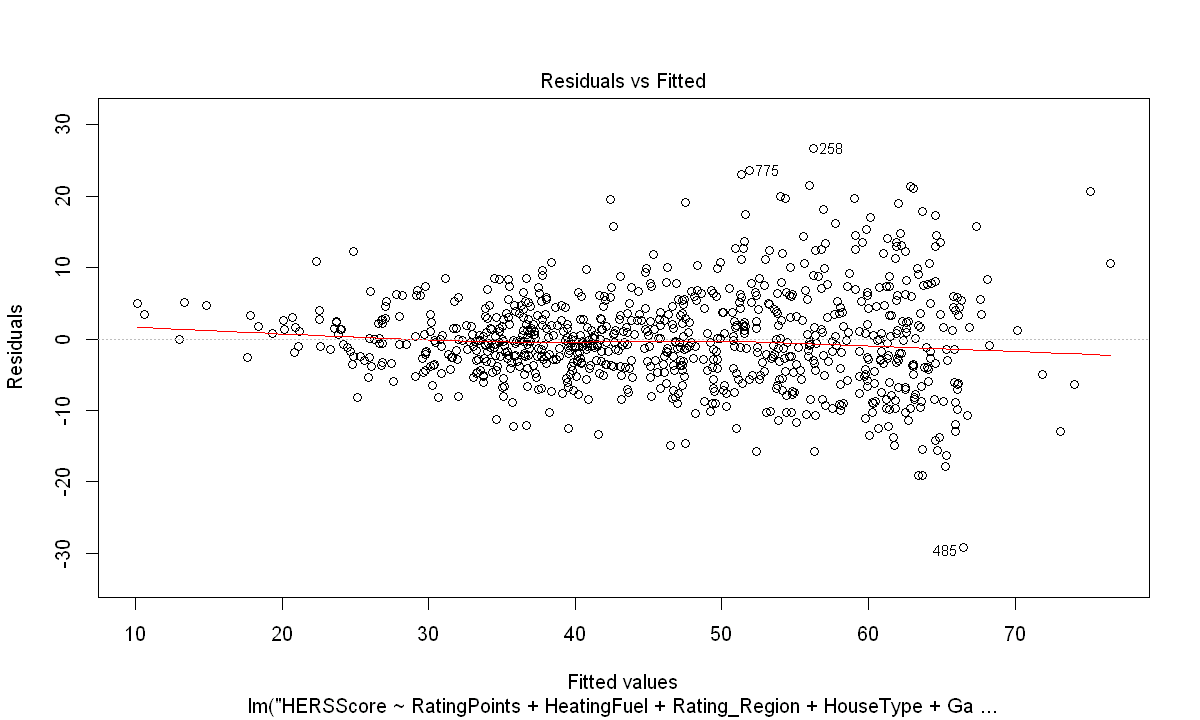

Warning message:
: not plotting observations with leverage one:
  810

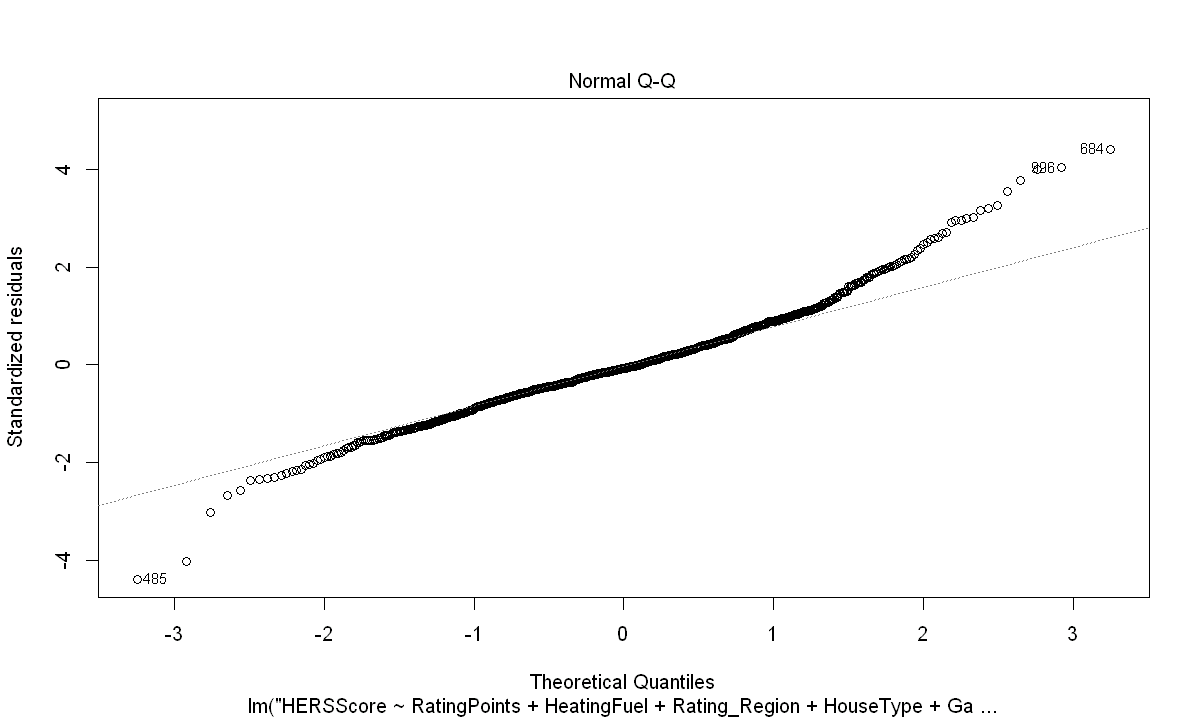

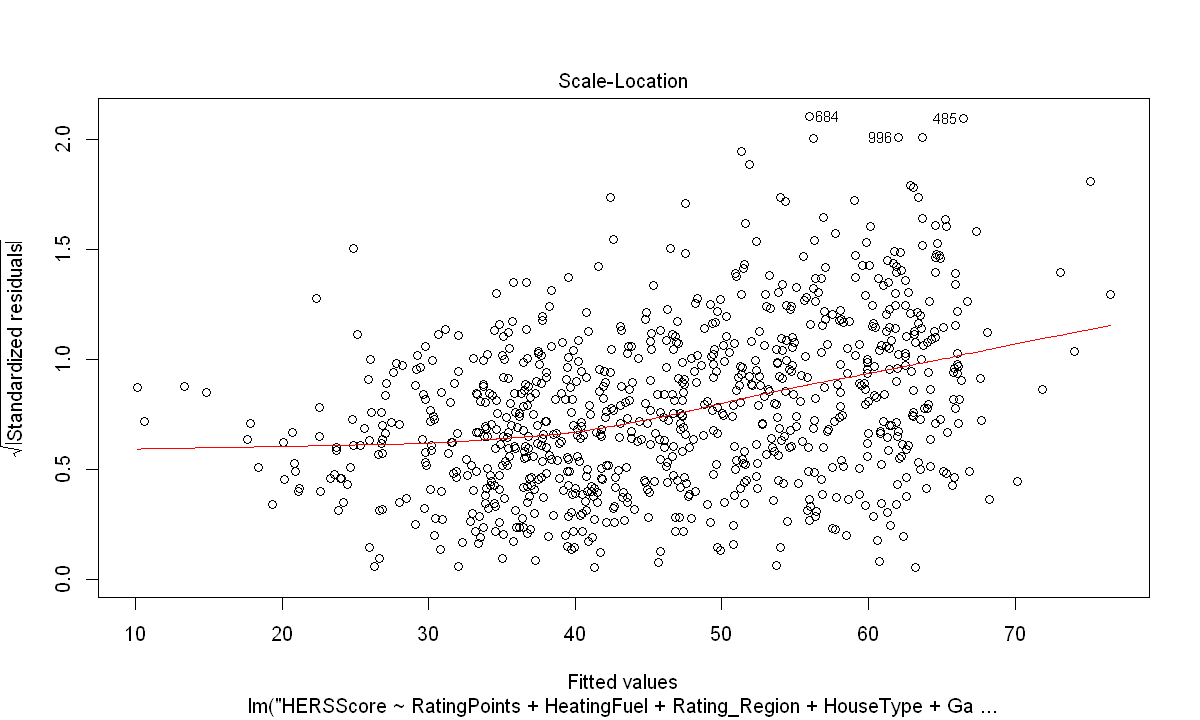

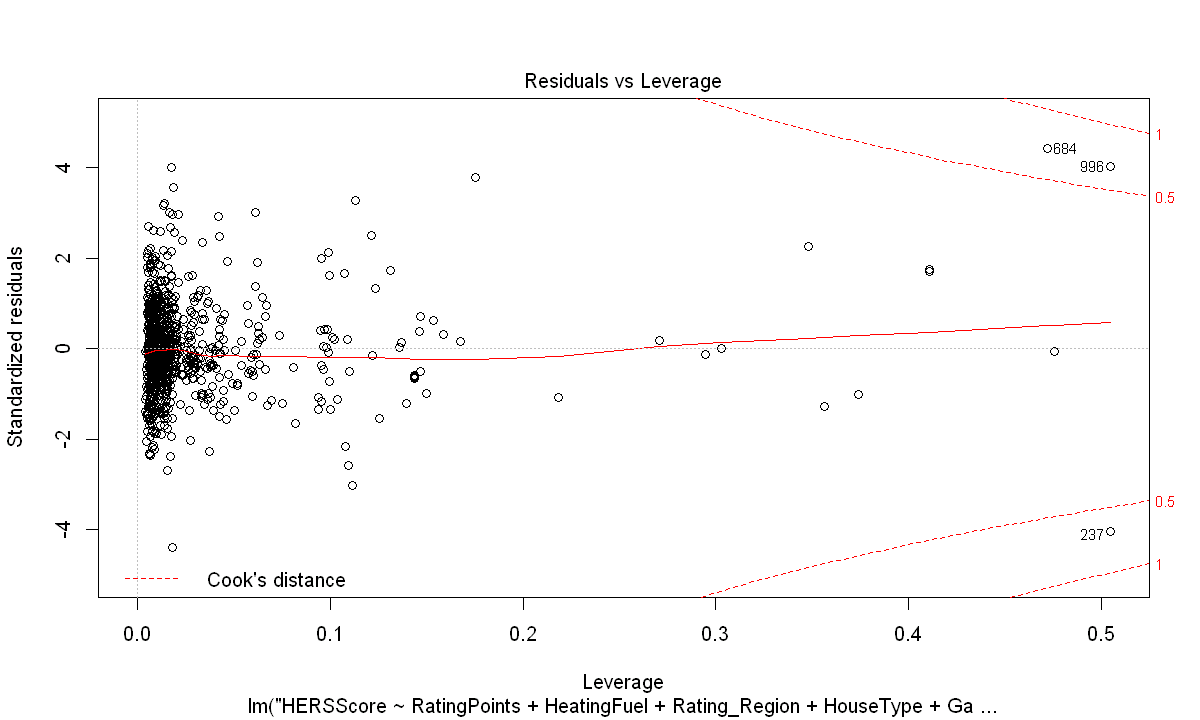

In [138]:
plot(fit)